4.691999999999999


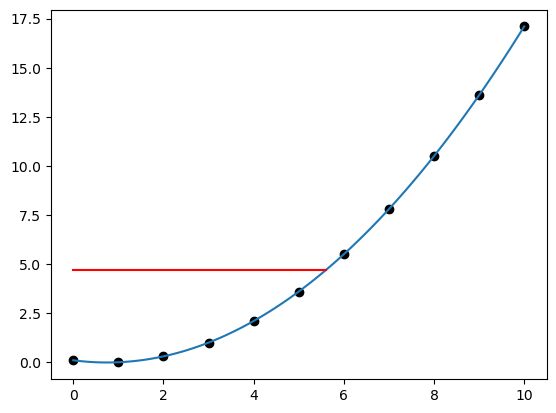

In [3]:
# Estimate y value given a value of x


import numpy as np
import matplotlib.pyplot as plt


x = np.arange(0,11,1)

def true_func(x):
    return 0.2*x**2 - 0.3*x + 0.1

plt.scatter(x, true_func(x), c='k' )

xp = np.linspace(0,10,100)
plt.plot( xp, true_func(xp) )

# true value we want to estimate is func value at x=5.6
tx = 5.6
ty = true_func(tx)
print(ty)
plt.plot([0,tx],[ty,ty], 'r-')

    

In [4]:
# write a func to compute polynomials return by np.polyfit
def pfunc(x, *pars):
    ps = np.flip(pars)
    res = np.zeros_like(x)
    for i, p in enumerate(ps):
        res += p*x**i
    return res

nsamps = 2000

# run some pseudo-experiments
results = []
for i in range(nsamps):
    
    # add noise to yvals
    y = true_func(x) + np.random.normal(0, 1, size=x.shape)
    
    # fit with p1, p2 and p6
    p1 = np.polyfit(x, y, deg=1)
    p2 = np.polyfit(x, y, deg=2)  
    p6 = np.polyfit(x, y, deg=6)
    
    # evaluate at the tx value
    y1 = pfunc(tx, *p1)
    y2 = pfunc(tx, *p2)
    y6 = pfunc(tx, *p6)
    
    results.append( [y1, y2, y6] )
    

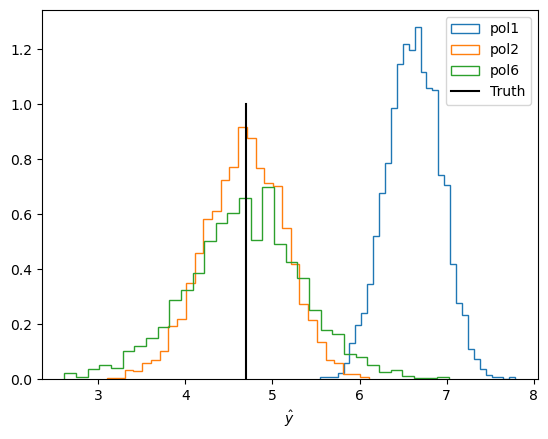

In [5]:
# evaluate the results
results = np.array( results )

plt.hist( results[:,0], bins='auto', density=True, histtype='step', label='pol1' )
plt.hist( results[:,1], bins='auto', density=True, histtype='step', label='pol2' )
plt.hist( results[:,2], bins='auto', density=True, histtype='step', label='pol6' )
plt.plot( [ty,ty], [0,1], 'k-', label='Truth')
plt.xlabel('$\hat{y}$')
plt.legend()


In [6]:
# Let's evaluate the estimates
for i, pol in enumerate(['pol1','pol2','pol6']):
    mean = np.mean( results[:,i] )
    sdev = np.std( results[:,i] )
    
    print(pol)
    print('  Mean:', mean)
    print('  Bias:', mean - ty)
    print('  sDev:', sdev)

pol1
  Mean: 6.6181796448498975
  Bias: 1.9261796448498982
  sDev: 0.30880554961414675
pol2
  Mean: 4.681033046309271
  Bias: -0.010966953690727976
  sDev: 0.46090279741282447
pol6
  Mean: 4.676718676048498
  Bias: -0.015281323951501058
  sDev: 0.6678266256703365
